# Explore Public Transportation in USA
## *Year of 2012*

## _Figure 2_: 
**How much is public transportation service used by residents for different transit modes?**

## Data source list:

* Data of public transportation from National Transit Database

## Glossary
* Transit mode
  * AR: In recognition of the special Federal relationship with the Alaska Railroad (AR), the passenger service portion of the Alaska Railroad (AR) is considered eligible for certain FTA funding under the Fixed Guideway Modernization program. The service encompasses only car miles for passenger cars; car miles for freight cars are specifically excluded.
  * CB: Commuter Bus
  * CC: Cable Car
  * CR: Commuter Rail
  * DR: Demand Response
  * DT: A special form of the demand response mode operated through taxicab providers. The mode is always purchased transportation type of service.
  * FB: Ferryboat
  * HR: Heavy Rail
  * IP: Inclined Plane
  * LR: A transit mode that typically is an electric railway with a light volume traffic capacity compared to heavy rail (HR)
  * MB: Bus
  * MG: Monorail and Automated Guideway modes
  * PB: Publico
  * RB: Bus Rapid Transit
  * SR: Streetcar Rail
  * TB: Trolleybus
  * VP: A transit mode comprised of vans, small buses and other vehicles operating as a ride sharing arrangement, providing transportation to a group of individuals traveling directly between their homes and a regular destination within the same geographical area. 
  * YR: Hybrid Rail

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [76]:
# NTD data of service
ntd_service_xls = "../data/ntd/2012/2012_Service.xls"
ntd_service_df = pd.read_excel(ntd_service_xls)

In [77]:
select_flag = np.logical_and.reduce((ntd_service_df.loc[:, 'Time_Period_Desc']=='Annual Total', \
                                     ~np.isnan(ntd_service_df.loc[:, 'Pass_Car_Rev_Miles_Num']), \
                                     ~np.isnan(ntd_service_df.loc[:, 'Passenger_Miles_Num'])))

ntd_service_df = ntd_service_df.loc[select_flag, :]
grouped_ntd_service = ntd_service_df.loc[:, ['Trs_Id', \
                                             'Mode_Cd', \
                                             'Pass_Car_Rev_Miles_Num', \
                                             'Passenger_Miles_Num']].groupby(['Trs_Id', 'Mode_Cd'])

In [78]:
grouped_ntd_service_agg = grouped_ntd_service.aggregate(np.sum)

In [79]:
idx = grouped_ntd_service_agg.index.names.index('Mode_Cd')
grouped_ntd_service_agg = grouped_ntd_service_agg.reset_index('Mode_Cd')

In [80]:
# calculate the ratio of passenger miles to vehicle revenue miles to see how much is public transit service is used. 
grouped_ntd_service_agg['Psg2Veh_Miles_Ratio_Num'] = grouped_ntd_service_agg['Passenger_Miles_Num']/grouped_ntd_service_agg['Pass_Car_Rev_Miles_Num']

In [81]:
# generate a new data frame to check the mile ratio of different transit modes
p2v_ratio_df = pd.DataFrame( \
                   { md : grouped_ntd_service_agg['Psg2Veh_Miles_Ratio_Num'][grouped_ntd_service_agg['Mode_Cd']==md] \
                    for md in np.unique(grouped_ntd_service_agg['Mode_Cd']) } )

In [82]:
p2v_ratio_df.columns

Index([u'AR', u'CB', u'CC', u'CR', u'DR', u'DT', u'FB', u'HR', u'IP', u'LR', u'MB', u'MG', u'PB', u'RB', u'SR', u'TB', u'VP', u'YR'], dtype='object')

In [83]:
# get the number of transit agencies for each transit mode
n_trs = np.array([ np.sum(~np.isnan(p2v_ratio_df[md])) for md in p2v_ratio_df.columns.values ])

In [95]:
np.max(p2v_ratio_df.max())

626.43247911529227

[]

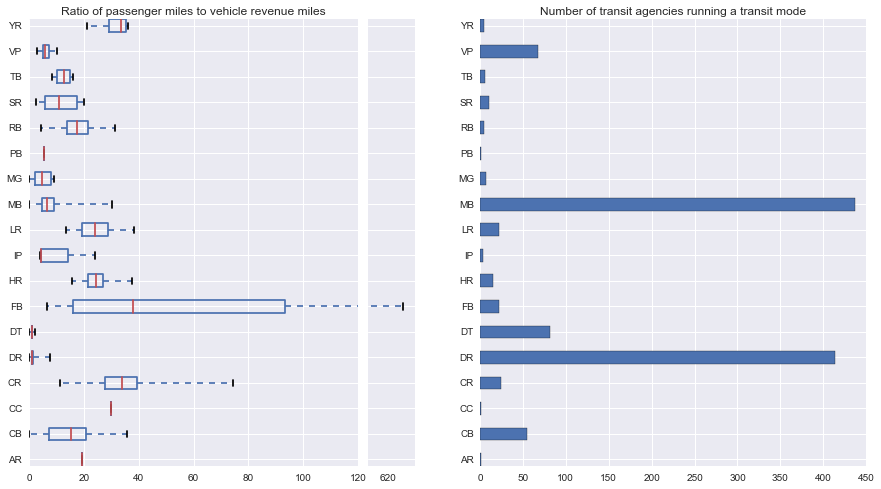

In [133]:
# plot
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(1, 15)

ax1 = fig.add_subplot(gs[:, 0:6])
ax1_0 = fig.add_subplot(gs[:, 6])
p2v_ratio_df.plot(ax=ax1, kind='box', vert=False)
ax1.set_xlim((0, 120))
ax1.spines['right'].set_visible(False)
ax1.set_title('Ratio of passenger miles to vehicle revenue miles')
p2v_ratio_df.plot(ax=ax1_0, kind='box', vert=False)
ax1_0.set_xlim((np.max(p2v_ratio_df.max())-15, np.max(p2v_ratio_df.max())+5))
ax1_0.xaxis.grid(b=False)
ax1_0.set_xticks([np.fix(np.max(p2v_ratio_df.max())/10) * 10])

ax2 = fig.add_subplot(gs[:, 8:], sharey=ax1)
ax2.barh(np.arange(len(n_trs))+1, n_trs, height=0.5, align='center')
ax2.set_title('Number of transit agencies running a transit mode')

ax1_0.set_ylim(ax1.get_ylim())
ax1_0.set_yticks(ax1.get_yticks())
ax1_0.set_yticklabels([])